# Run Pipeplines with Azure Machine Learning Python SDK

You use the Azure python SDK to orchestrate steps in a Pipeline will run in succession or in Parallel on a compute target

# Connect to a Workspace

To connect to a workspace, we need identifier parameters - a subscription ID, resource group name, and workspace name. A `config.json` file containing these parameters can be downloaded from the Azure Machine Learning workspace or Azure portal.

In [25]:
from azureml.core import Workspace

ws = Workspace.from_config(path="../../config.json")

## Create the Experiment

In [26]:
from azureml.core import Experiment
import pandas as pd

# create the experiment
experiment = Experiment(workspace=ws, name="diabetes-train-predict")


## Exploratory Data Analysis Step

Loading Data...
Correlation between features
                         PatientID  Pregnancies  PlasmaGlucose  \
PatientID                1.000000     0.004579       0.004778   
Pregnancies              0.004579     1.000000       0.055883   
PlasmaGlucose            0.004778     0.055883       1.000000   
DiastolicBloodPressure   0.015062     0.050251       0.009093   
TricepsThickness        -0.003760     0.059983       0.026193   
SerumInsulin            -0.028858     0.115830       0.028525   
BMI                     -0.005280     0.098109       0.022023   
DiabetesPedigree        -0.021706     0.056039       0.011044   
Age                     -0.010009     0.144361       0.036698   
Diabetic                -0.021959     0.405161       0.128800   

                        DiastolicBloodPressure  TricepsThickness  \
PatientID                             0.015062         -0.003760   
Pregnancies                           0.050251          0.059983   
PlasmaGlucose                     

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


PatientID Statistics:
Minimum:1000038.00
Mean:1502122.08
Median:1504394.00
Mode:1015338.00
Maximum:1999997.00

Pregnancies Statistics:
Minimum:0.00
Mean:3.26
Median:2.00
Mode:0.00
Maximum:14.00



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


PlasmaGlucose Statistics:
Minimum:44.00
Mean:107.85
Median:105.00
Mode:97.00
Maximum:192.00

DiastolicBloodPressure Statistics:
Minimum:24.00
Mean:71.21
Median:72.00
Mode:81.00
Maximum:117.00



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


TricepsThickness Statistics:
Minimum:7.00
Mean:28.82
Median:31.00
Mode:11.00
Maximum:92.00

SerumInsulin Statistics:
Minimum:14.00
Mean:139.24
Median:85.00
Mode:28.00
Maximum:796.00



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


BMI Statistics:
Minimum:18.20
Mean:31.57
Median:31.92
Mode:18.20
Maximum:56.03

DiabetesPedigree Statistics:
Minimum:0.08
Mean:0.40
Median:0.20
Mode:0.08
Maximum:2.30



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Age Statistics:
Minimum:21.00
Mean:30.13
Median:24.00
Mode:22.00
Maximum:77.00

Diabetic Statistics:
Minimum:0.00
Mean:0.33
Median:0.00
Mode:0.00
Maximum:1.00



/var/folders/hc/75f2v8756lz376jb6_px2_ym0000gn/T/ipykernel_46442/2792795832.py:92: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10, 12))


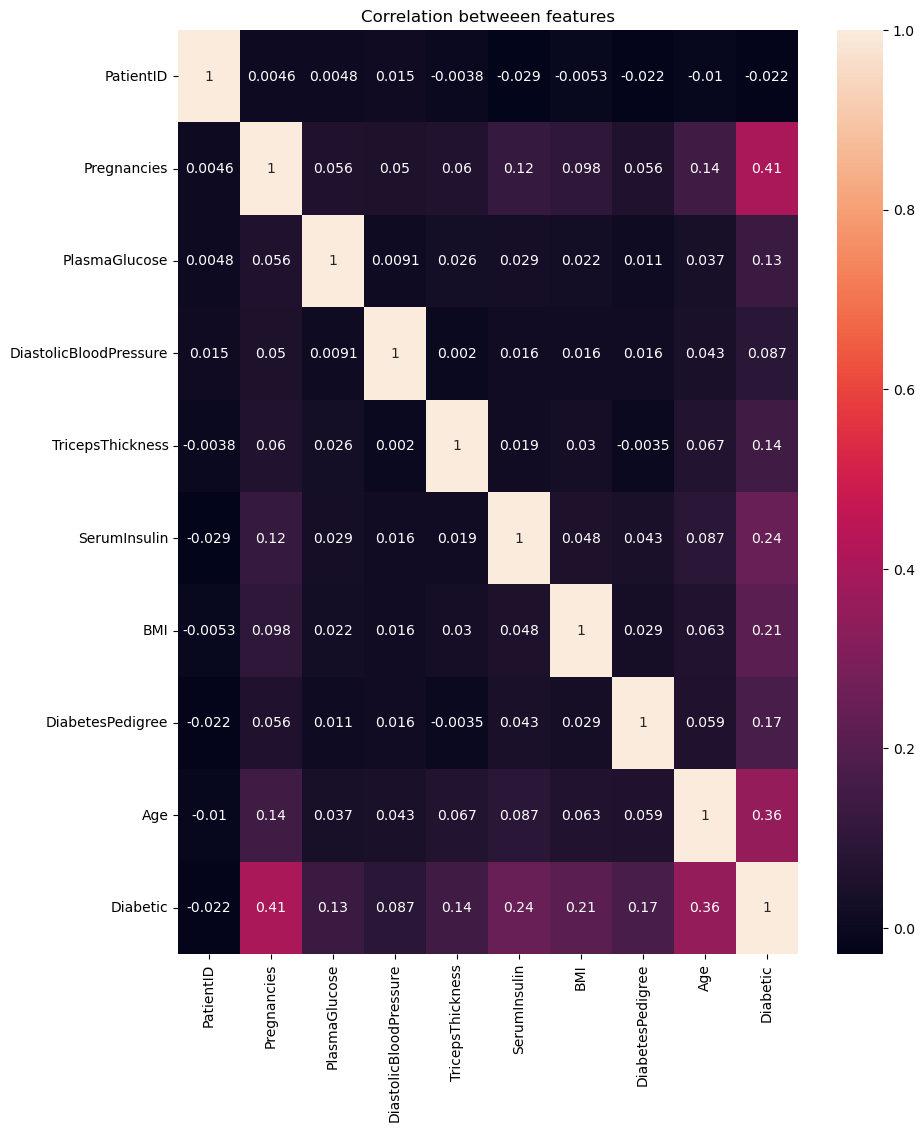

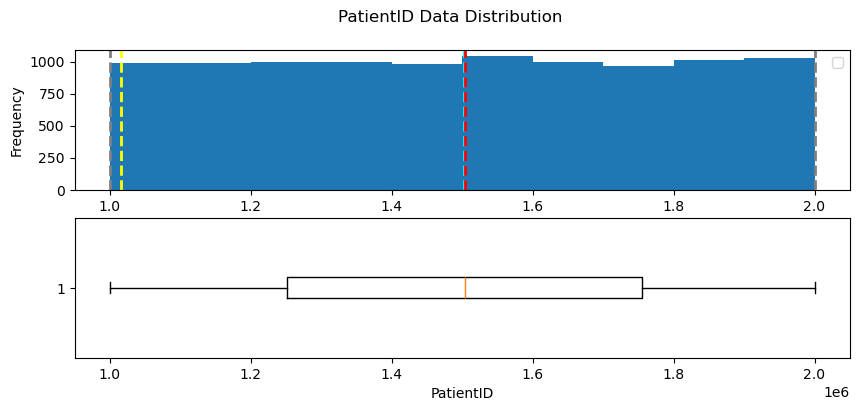

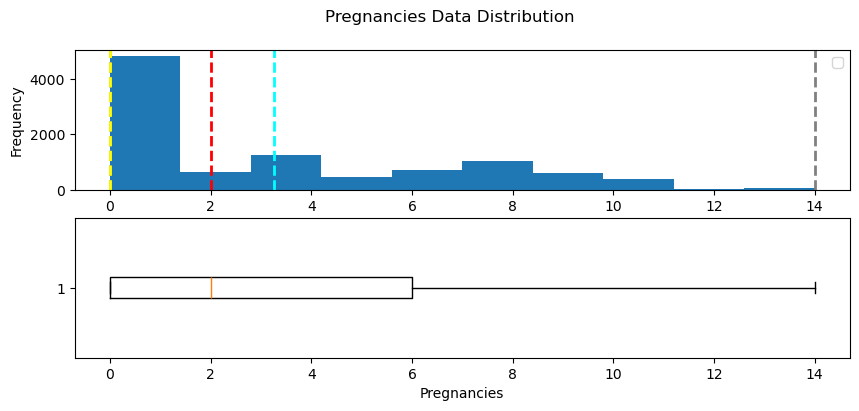

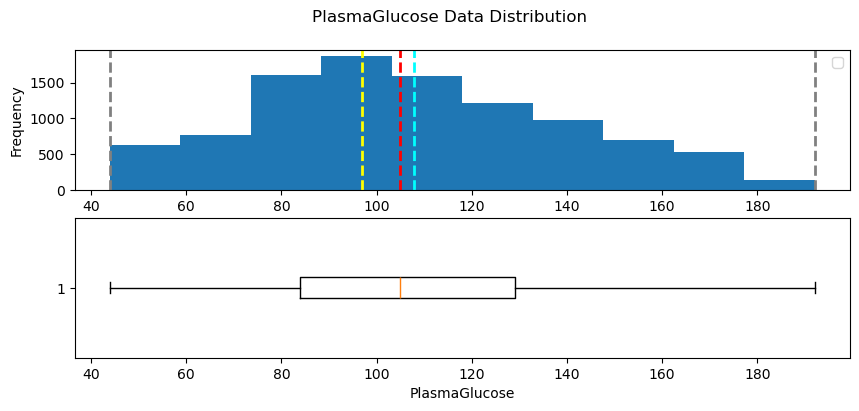

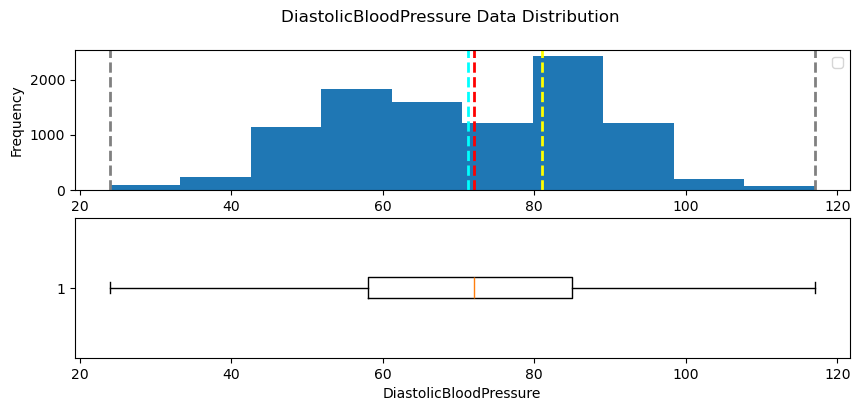

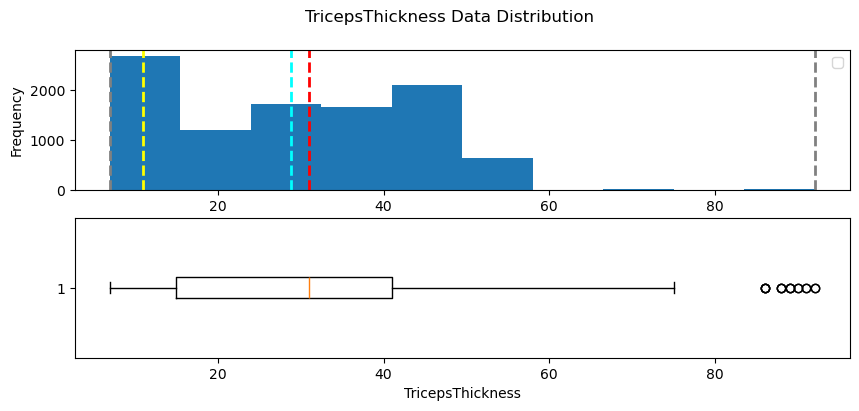

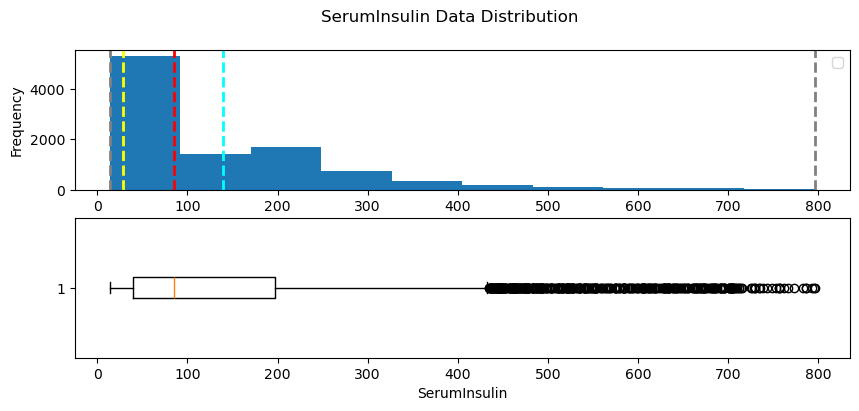

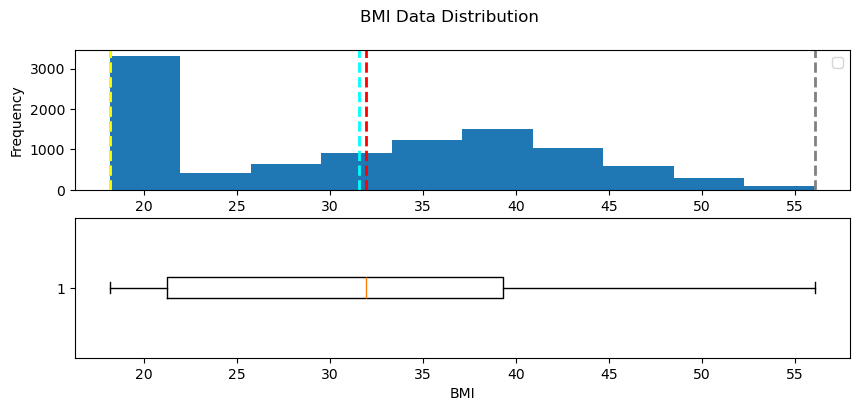

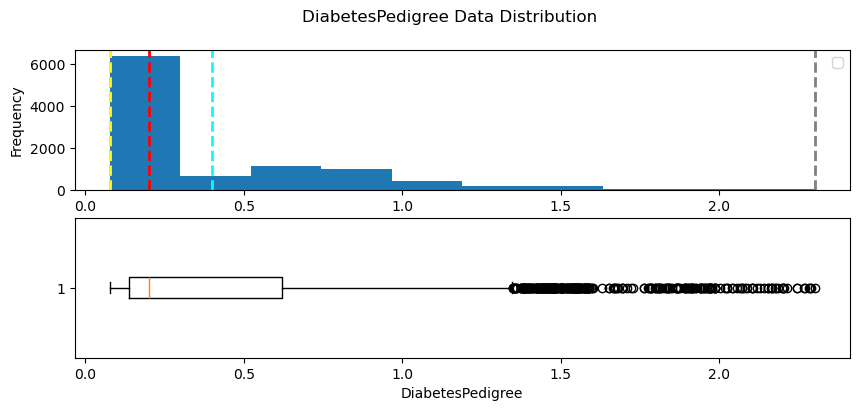

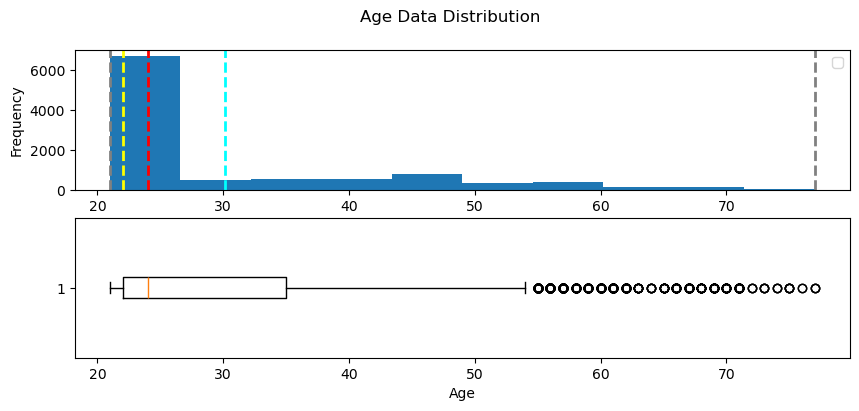

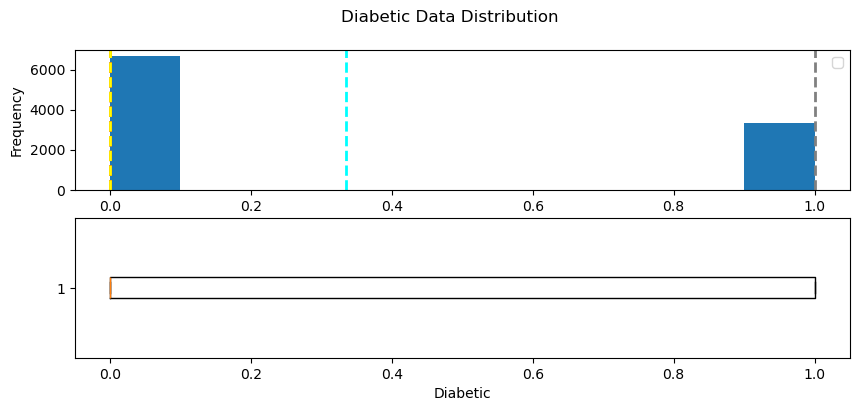

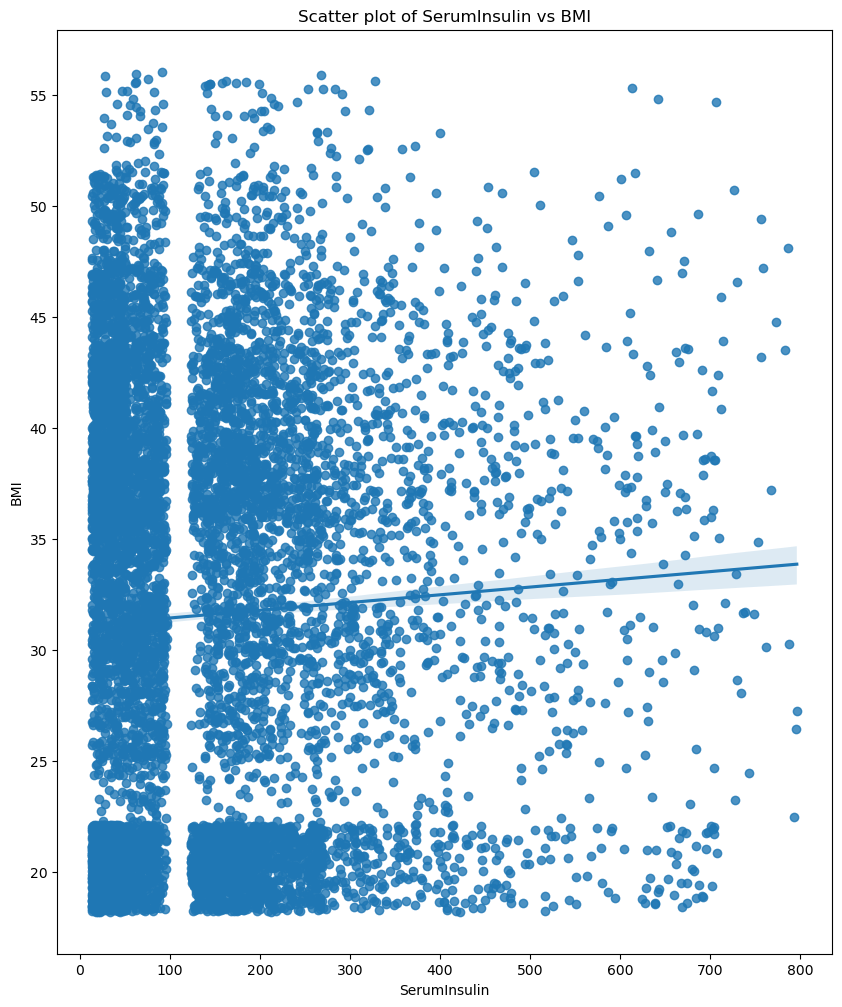

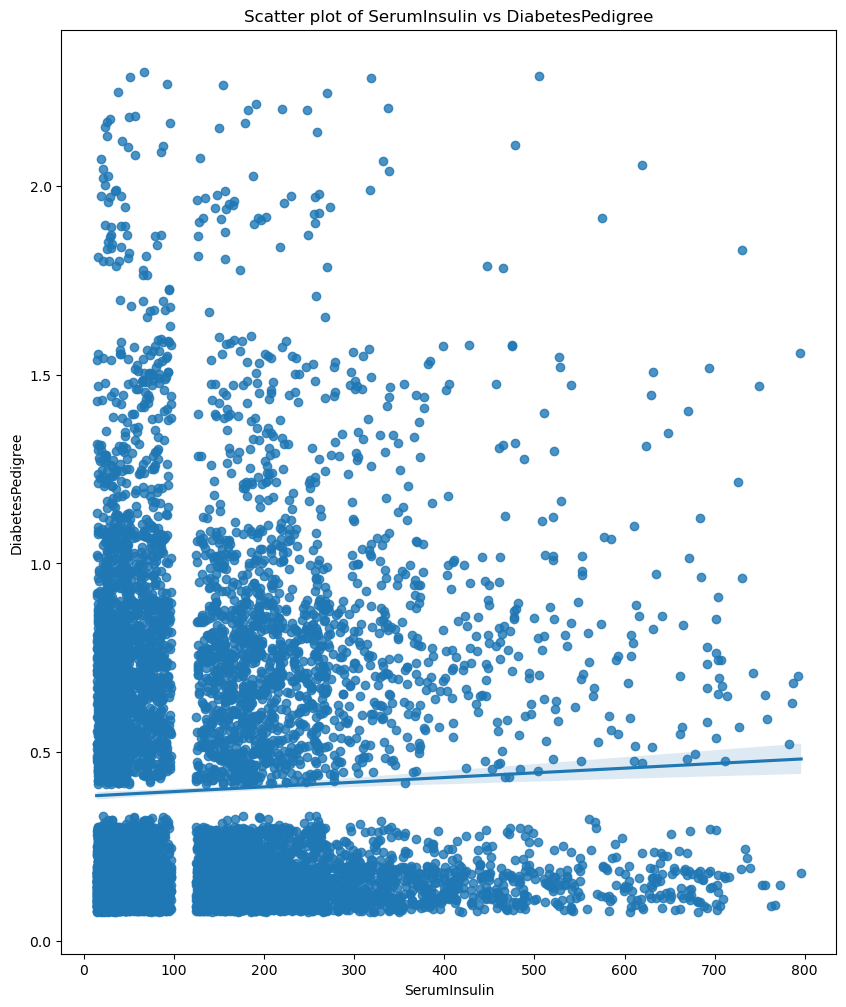

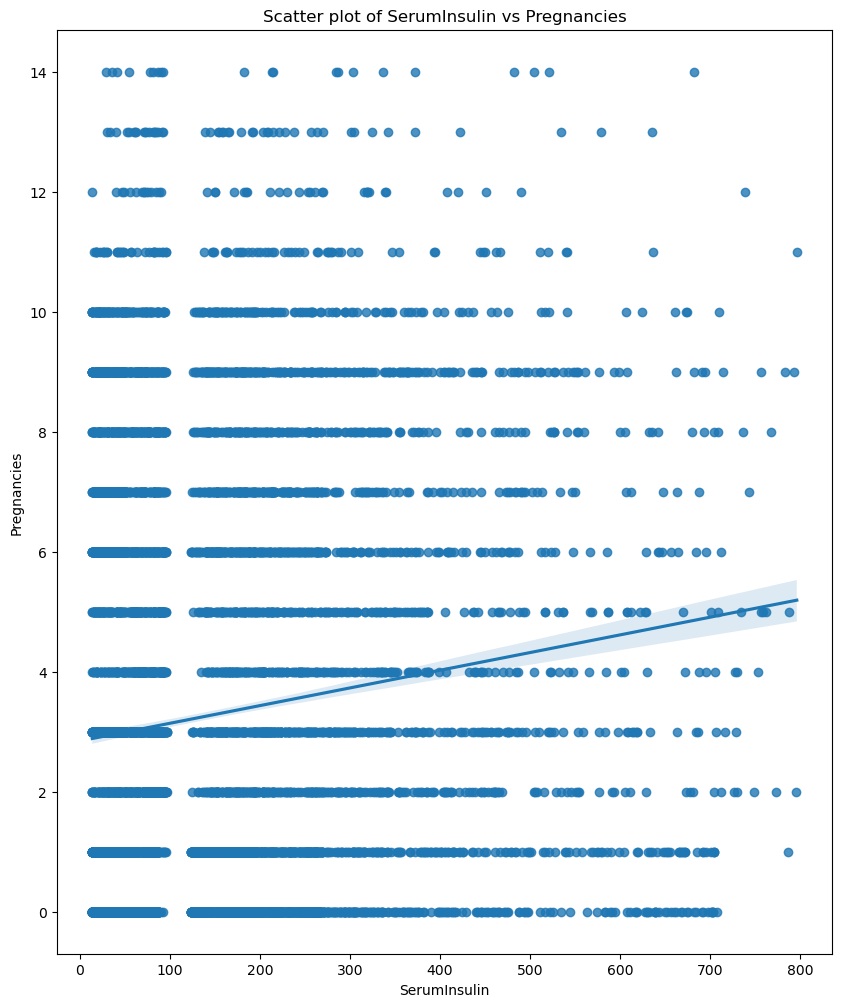

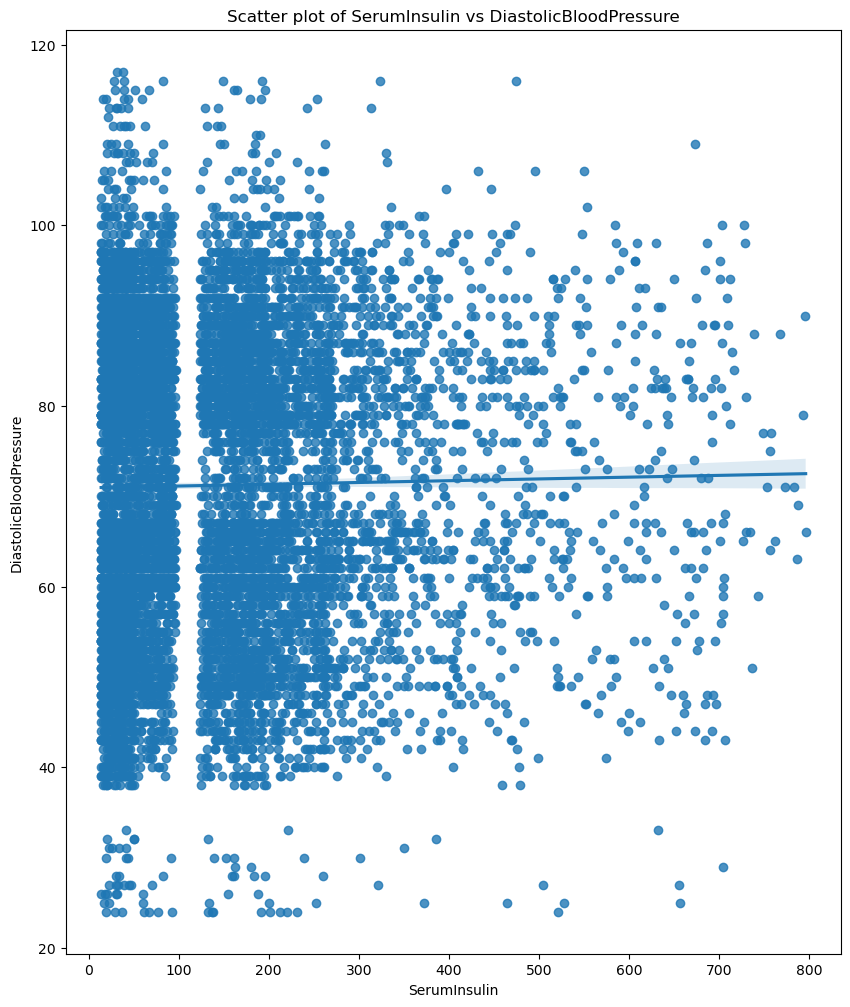

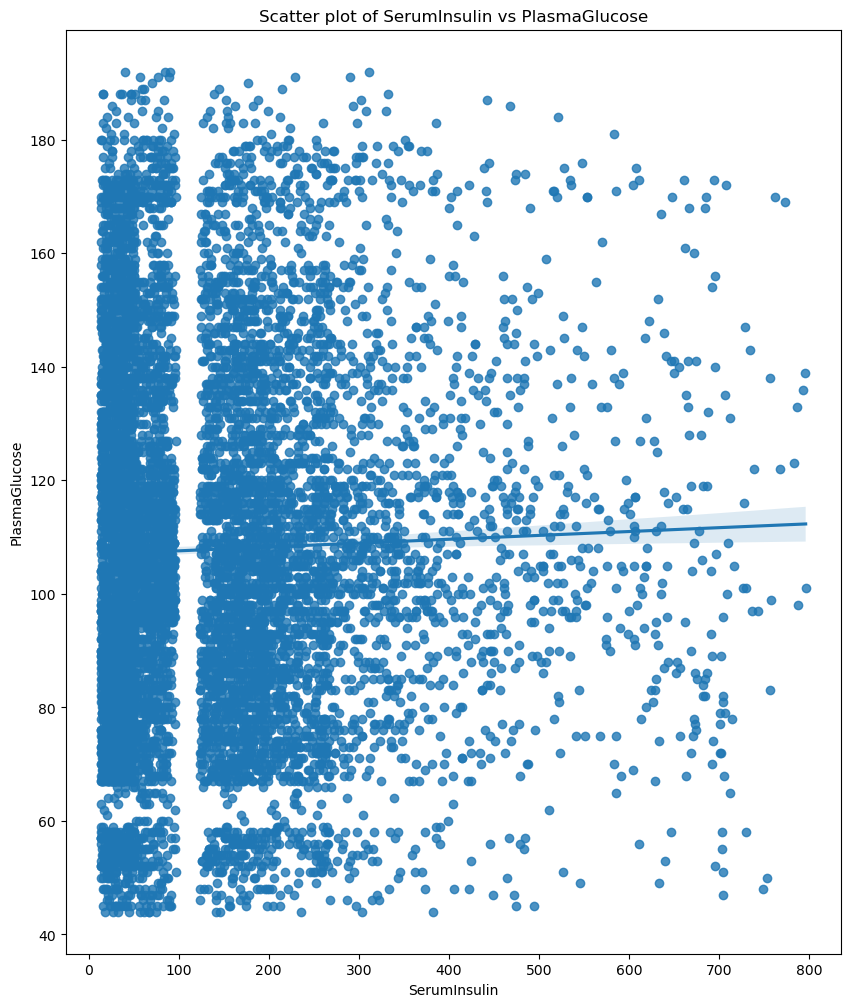

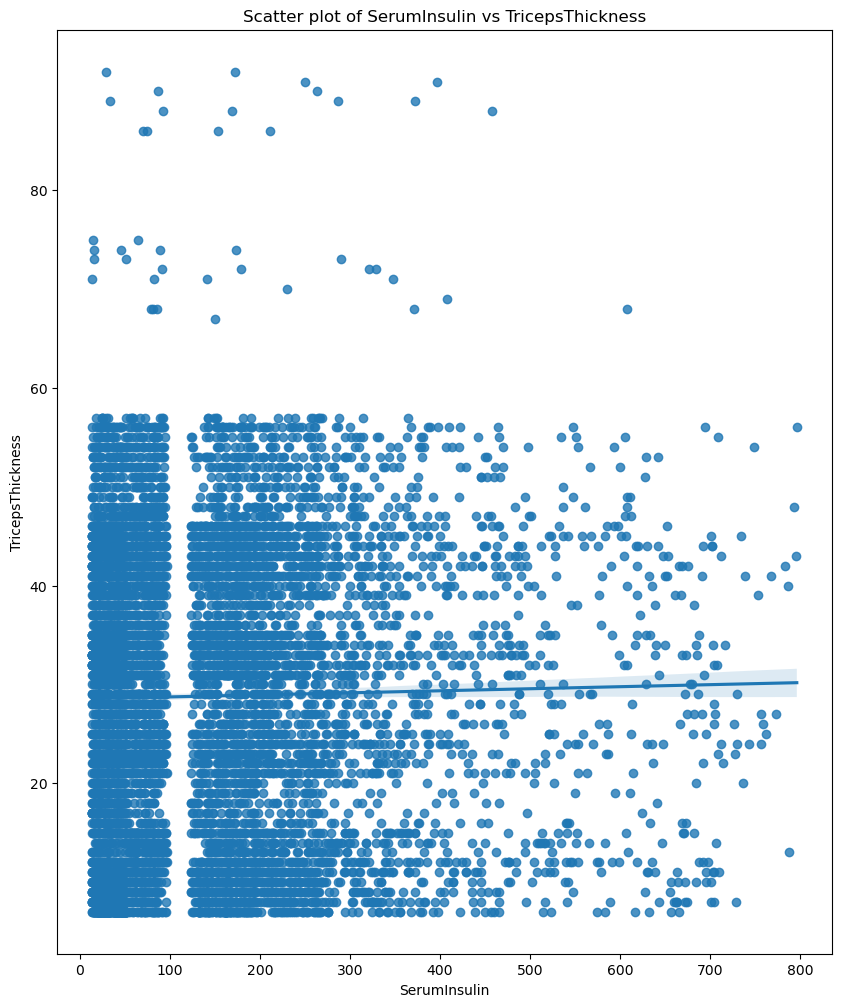

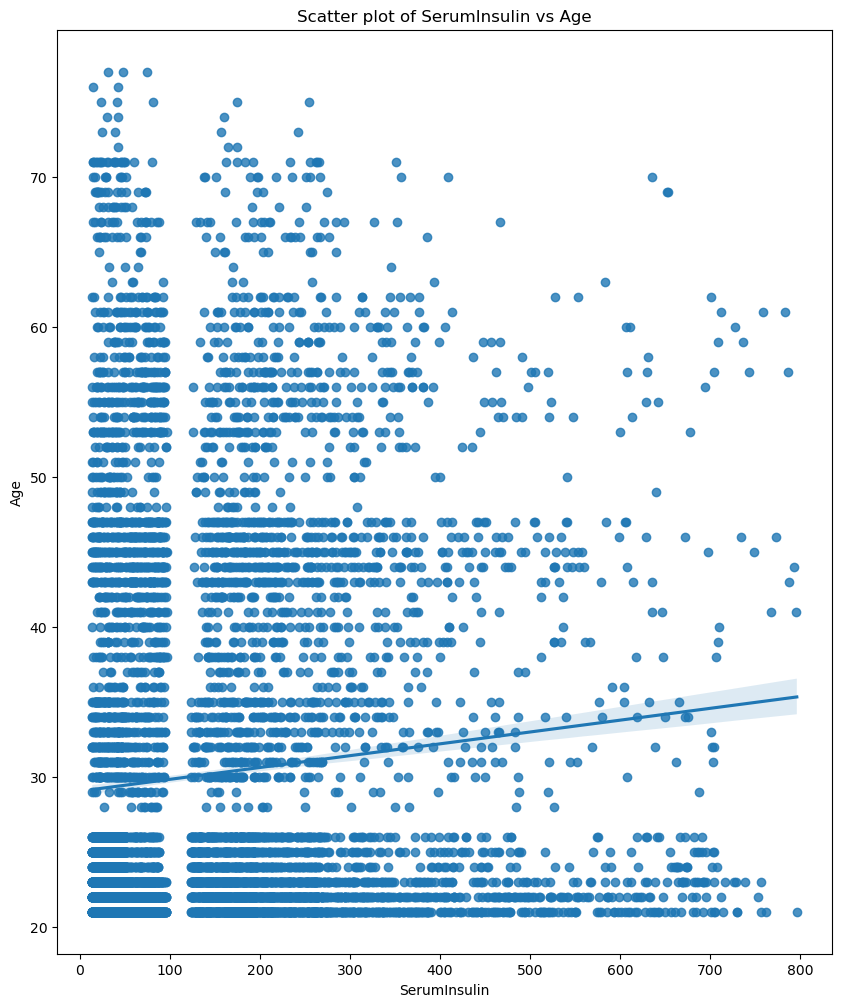

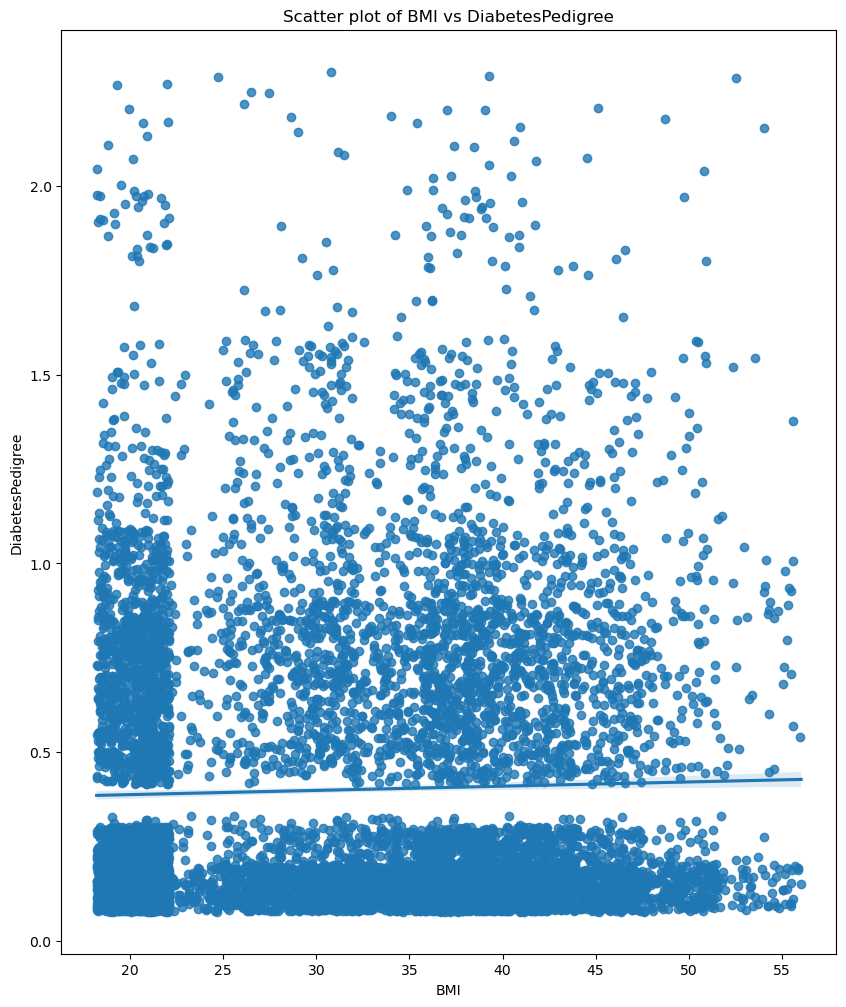

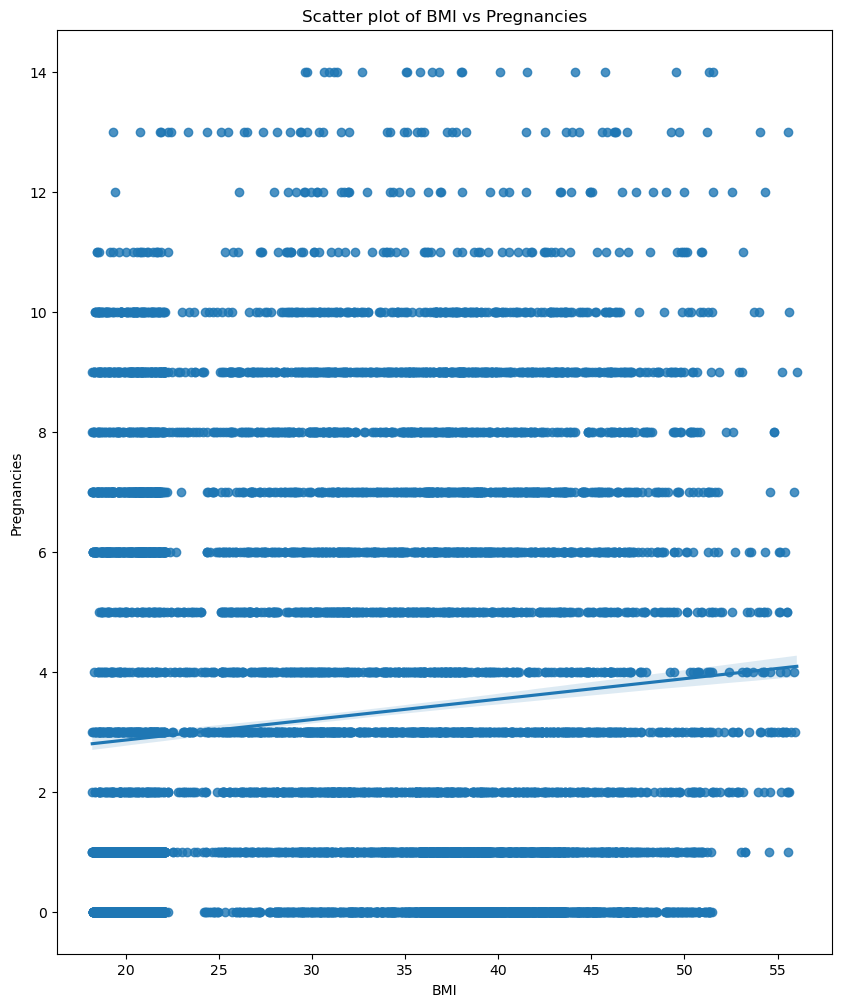

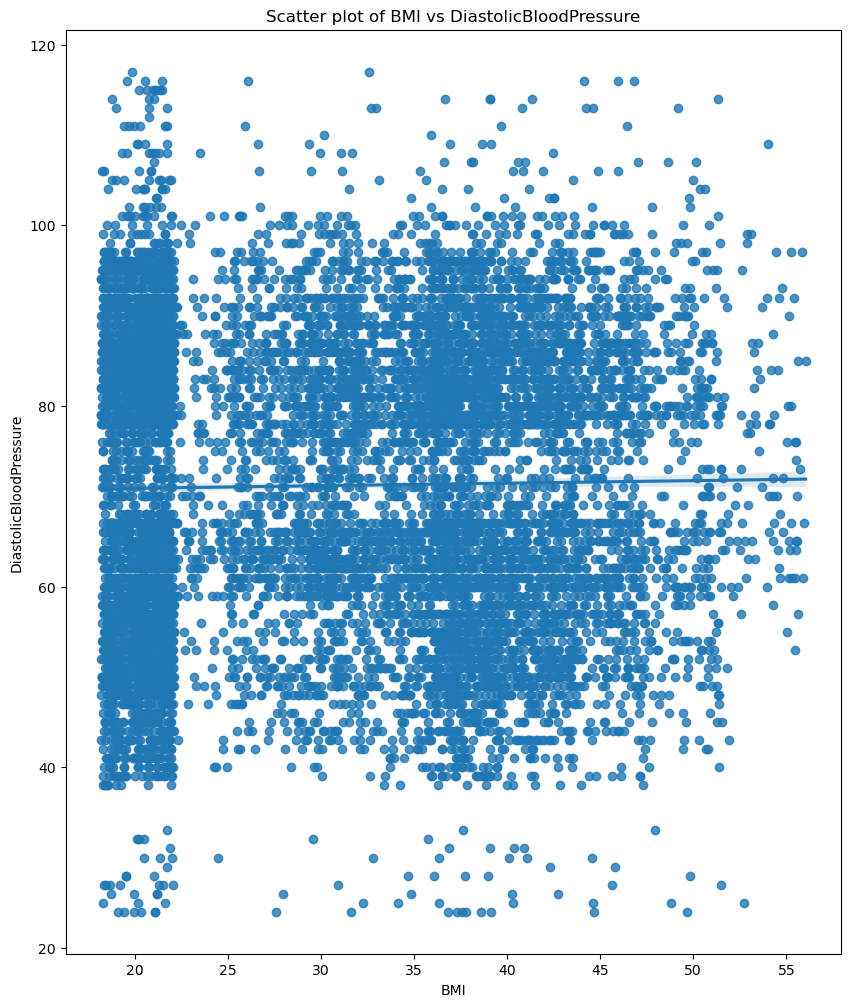

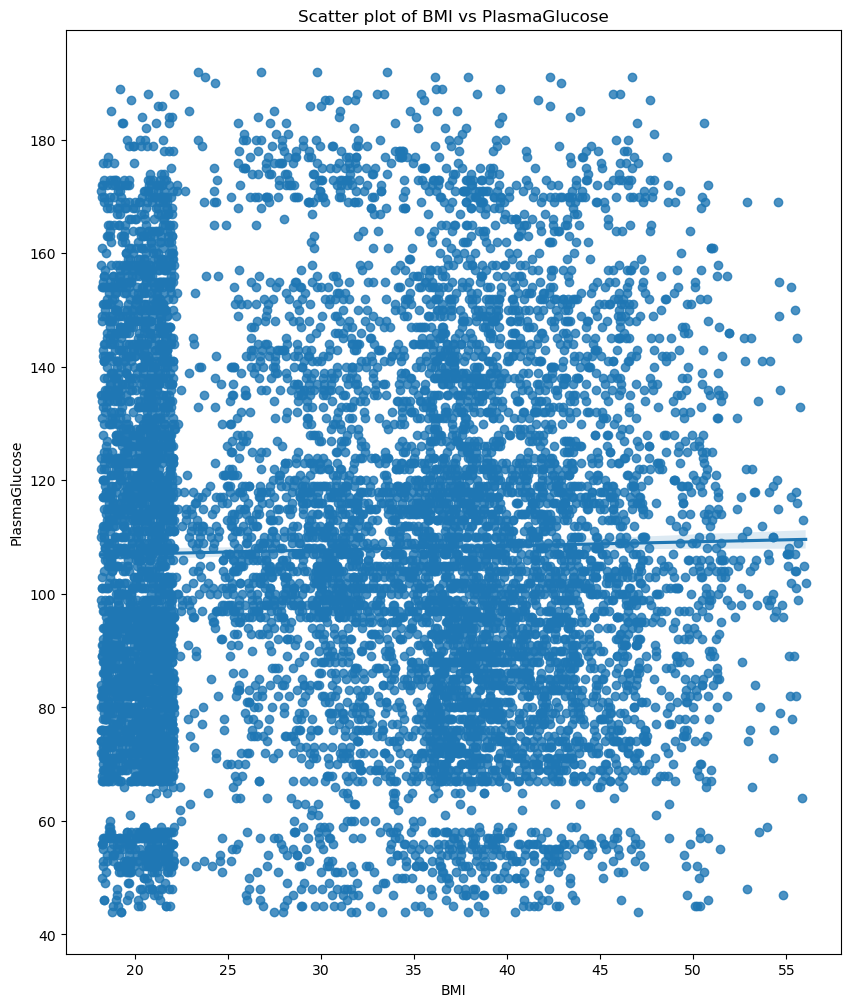

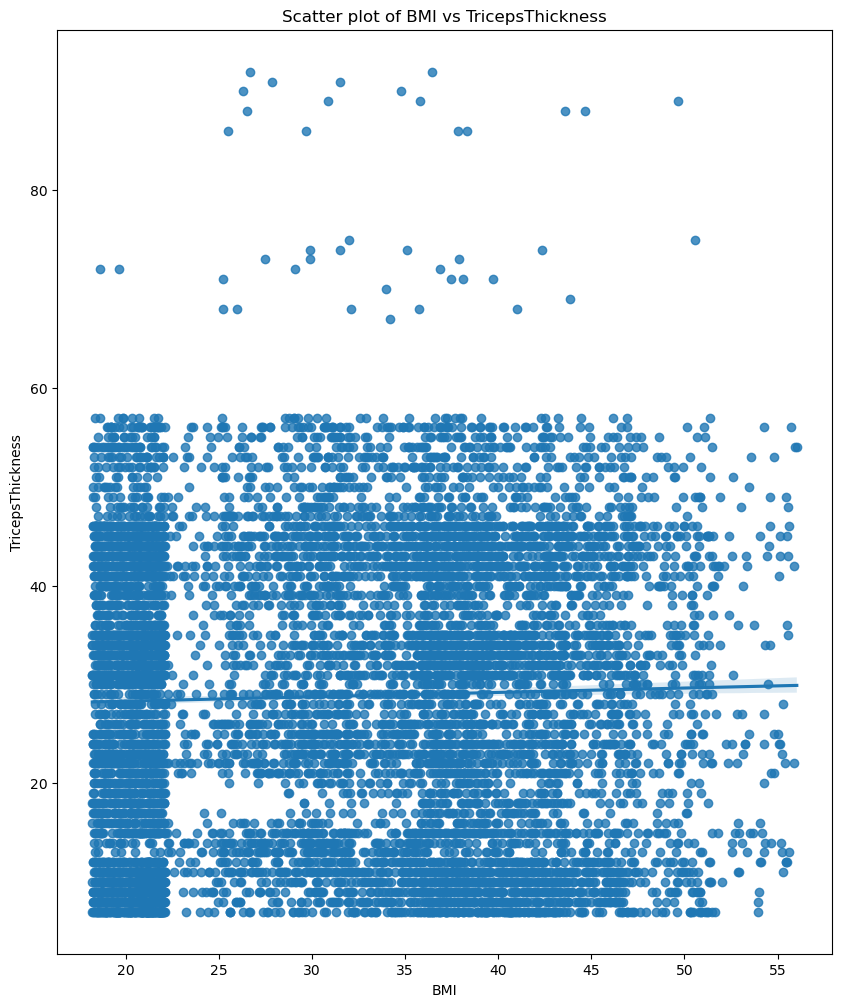

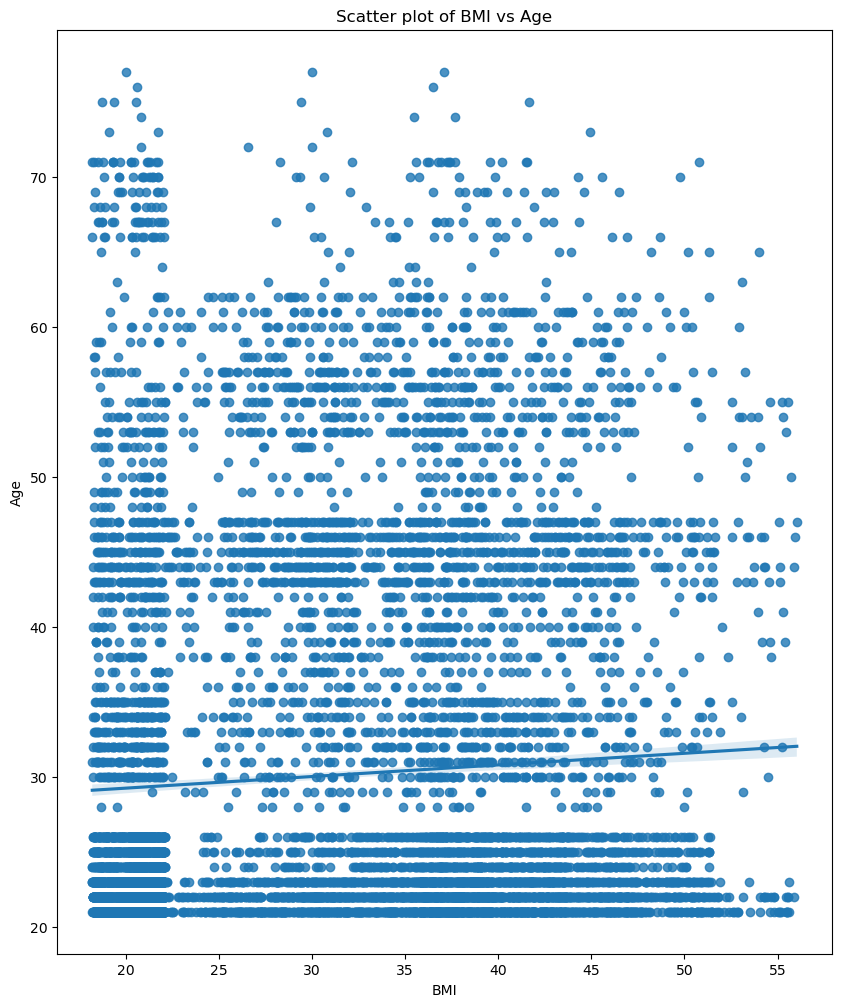

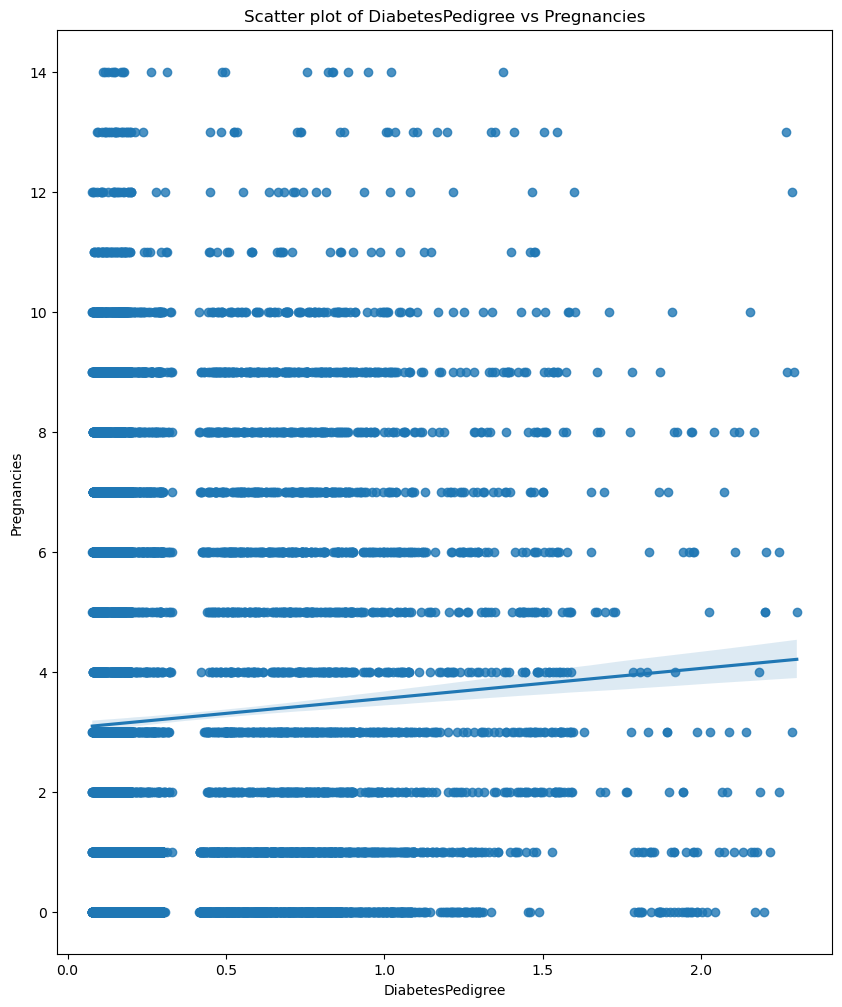

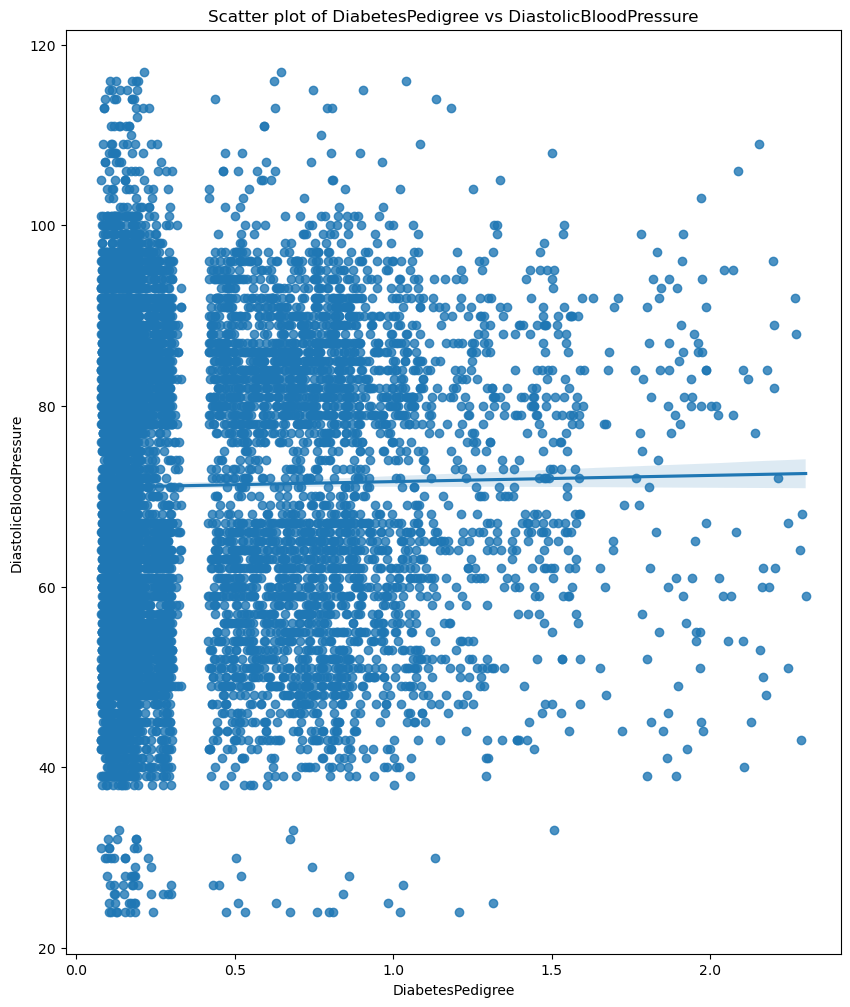

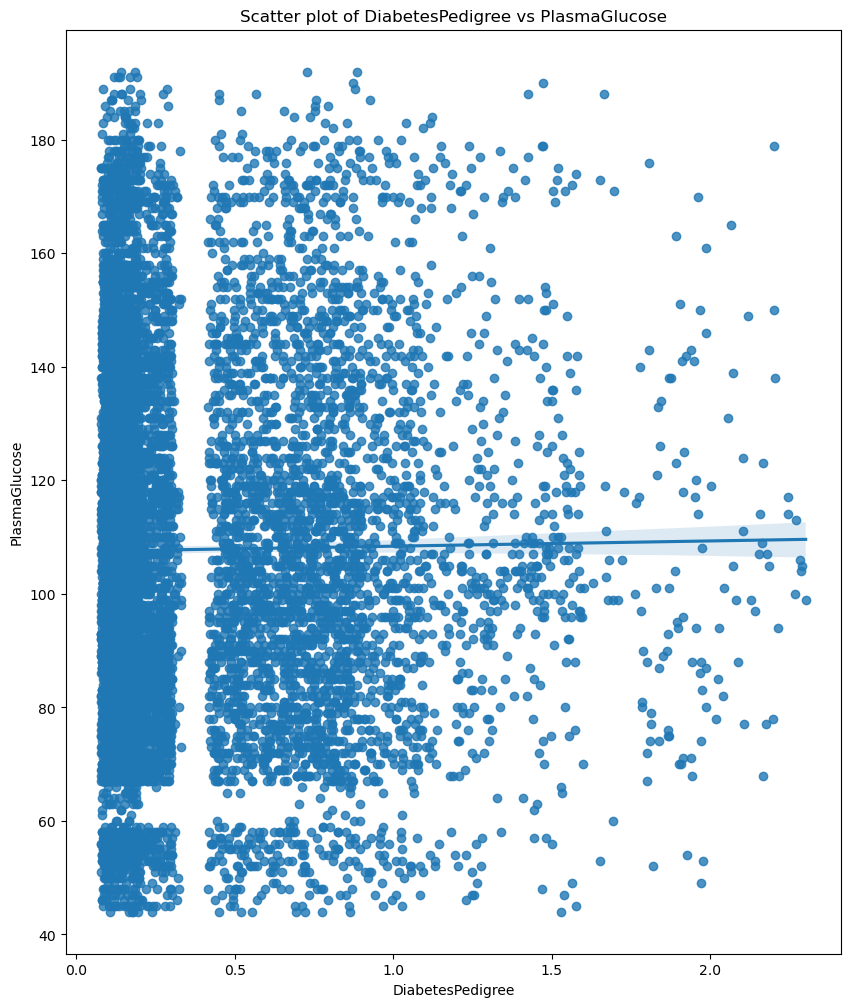

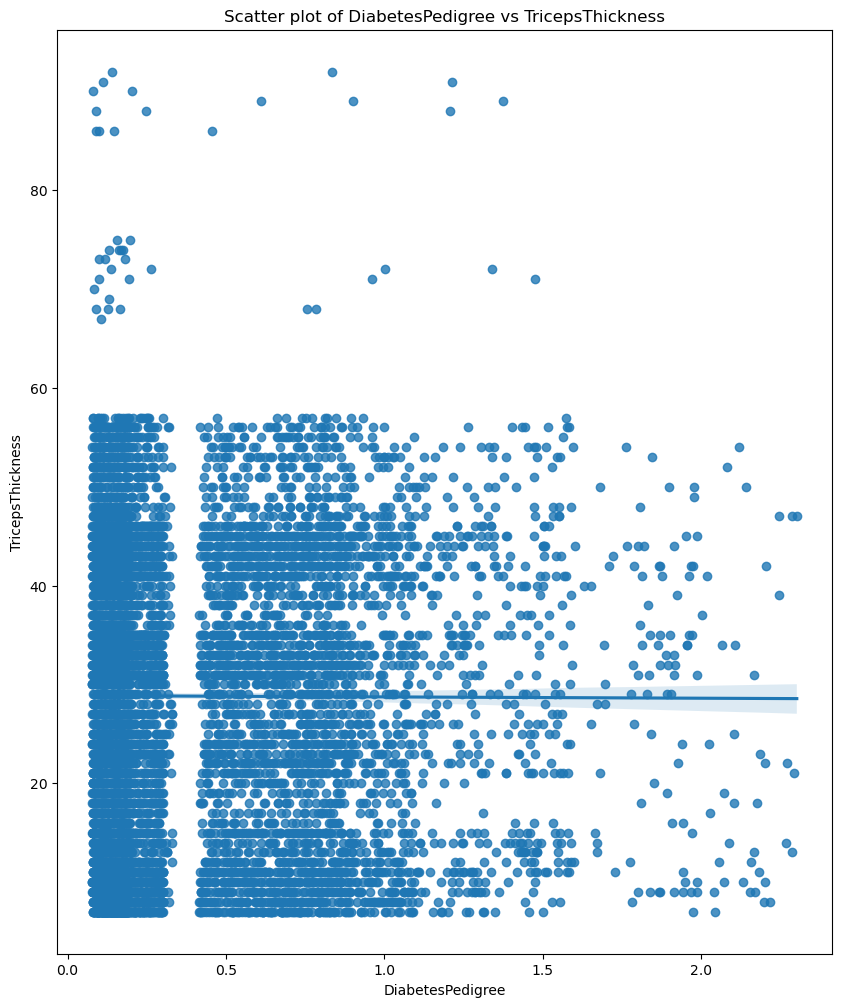

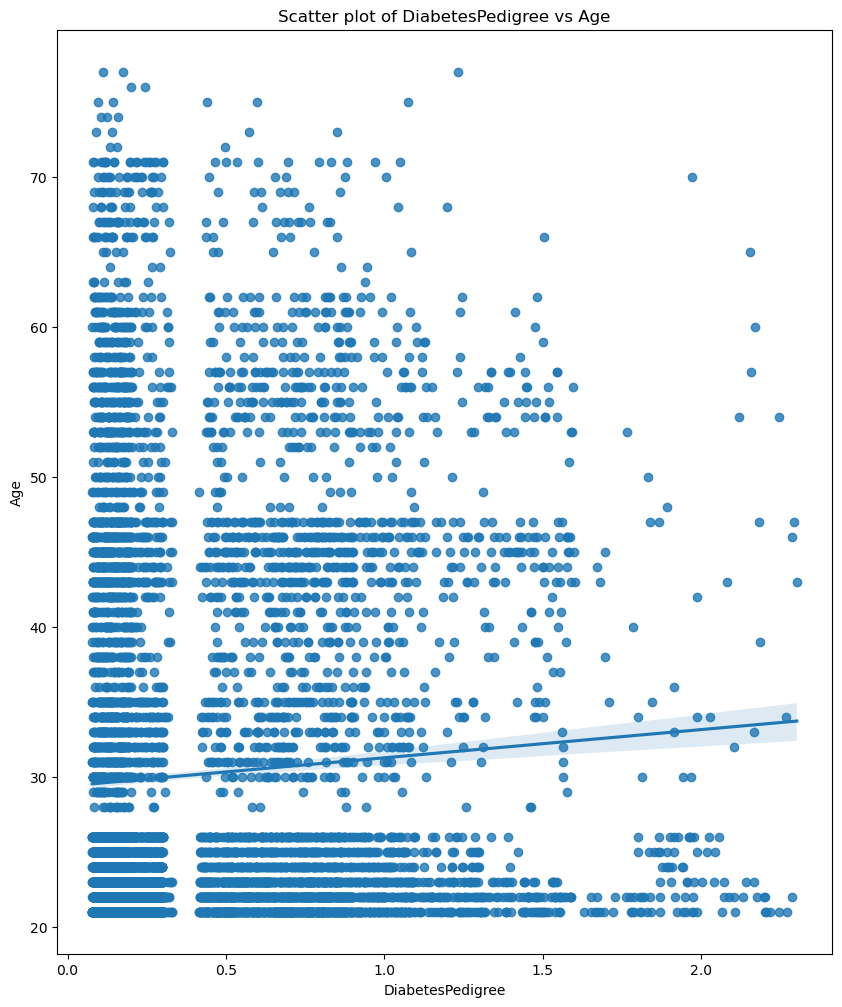

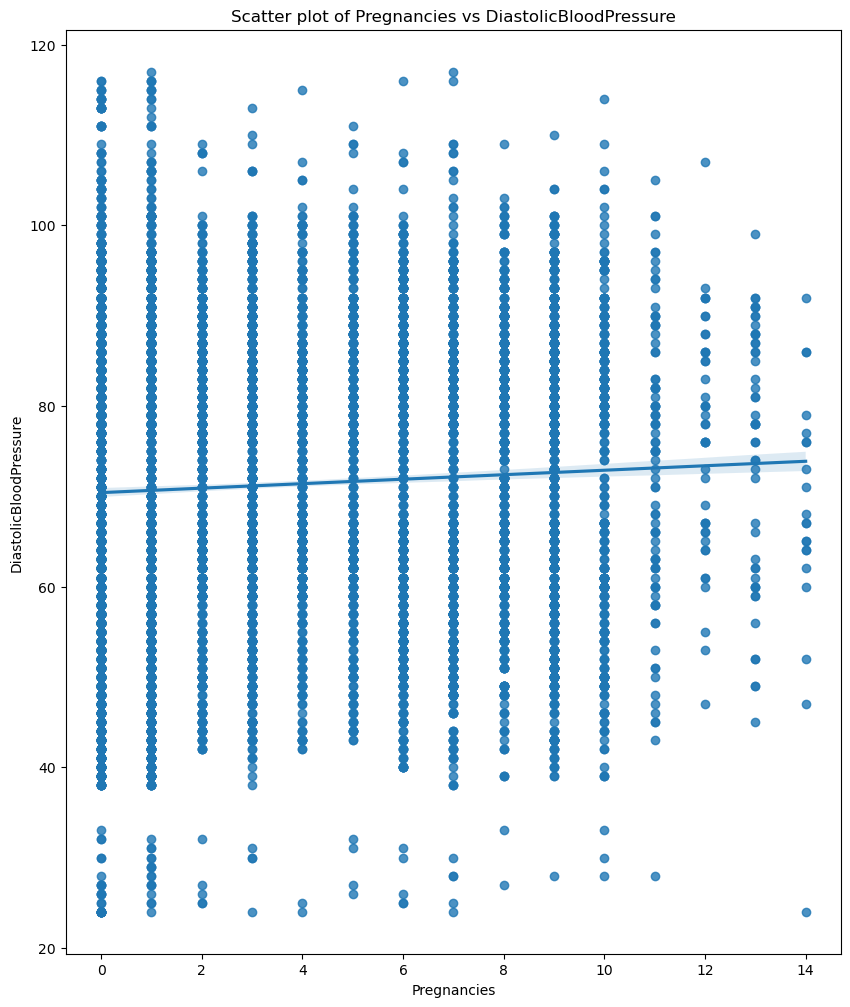

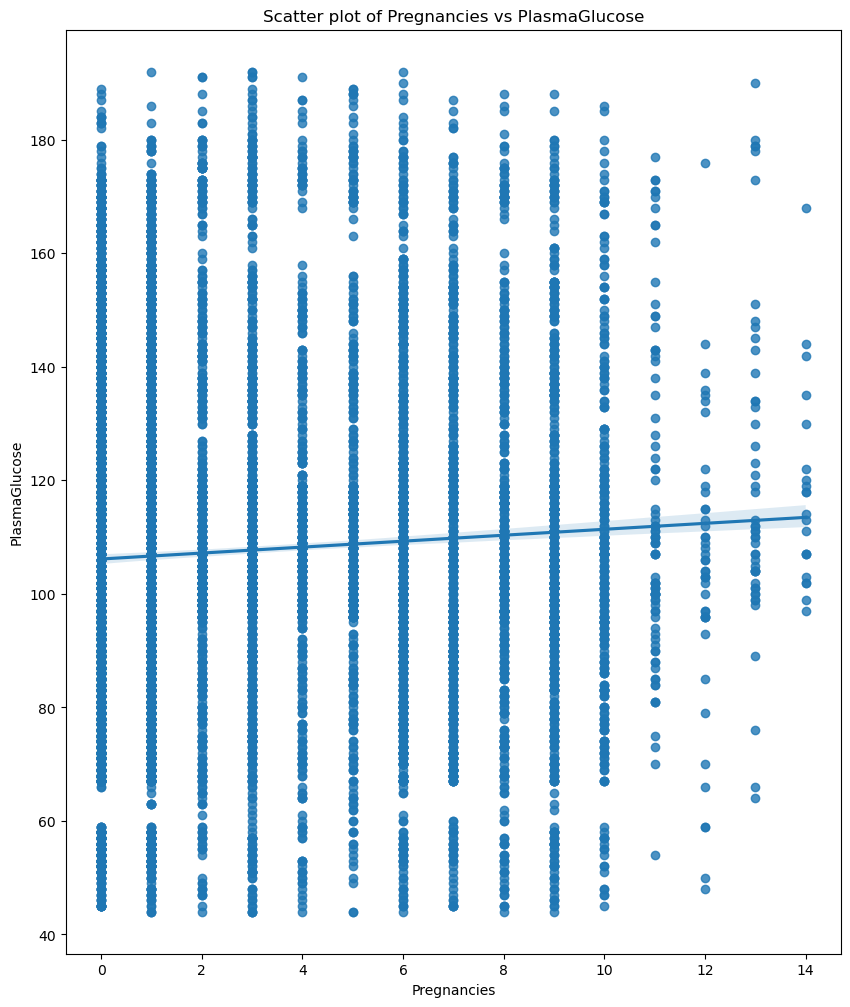

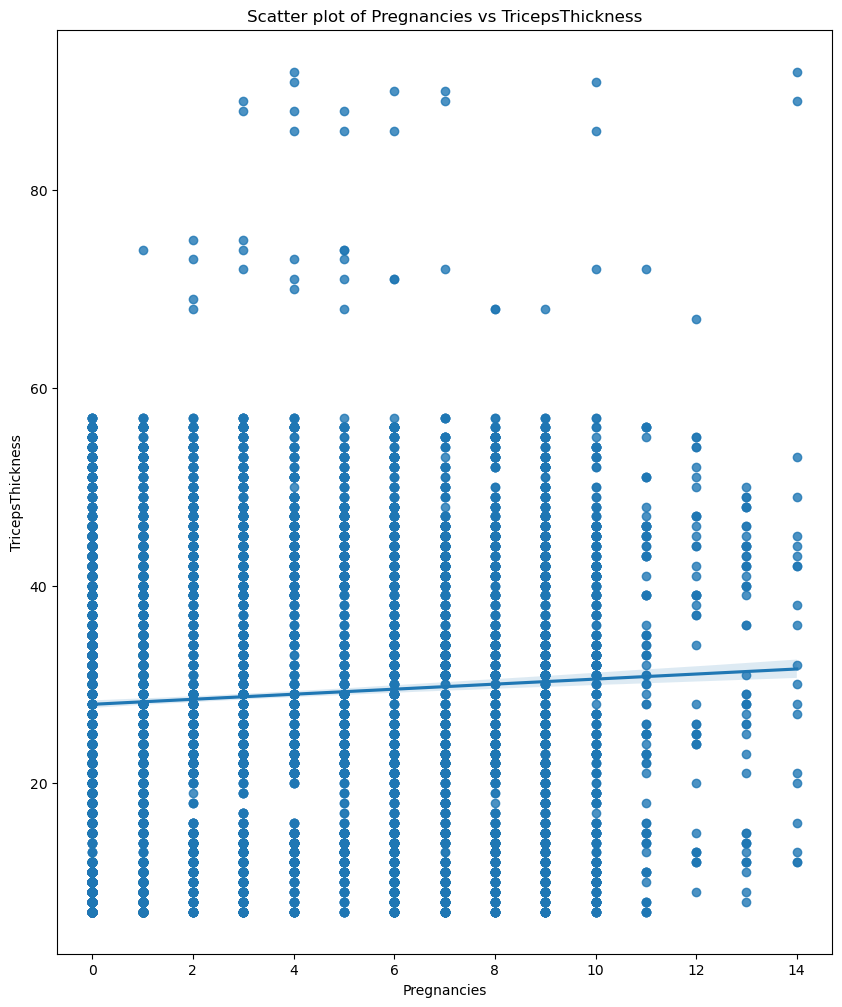

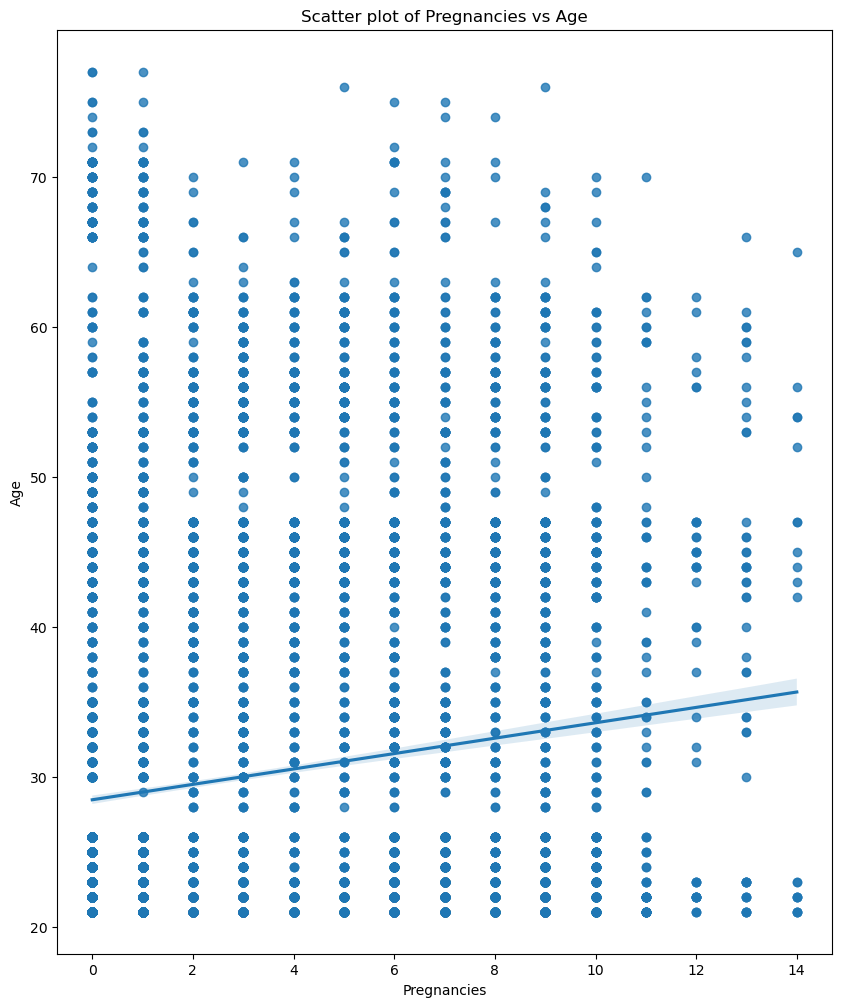

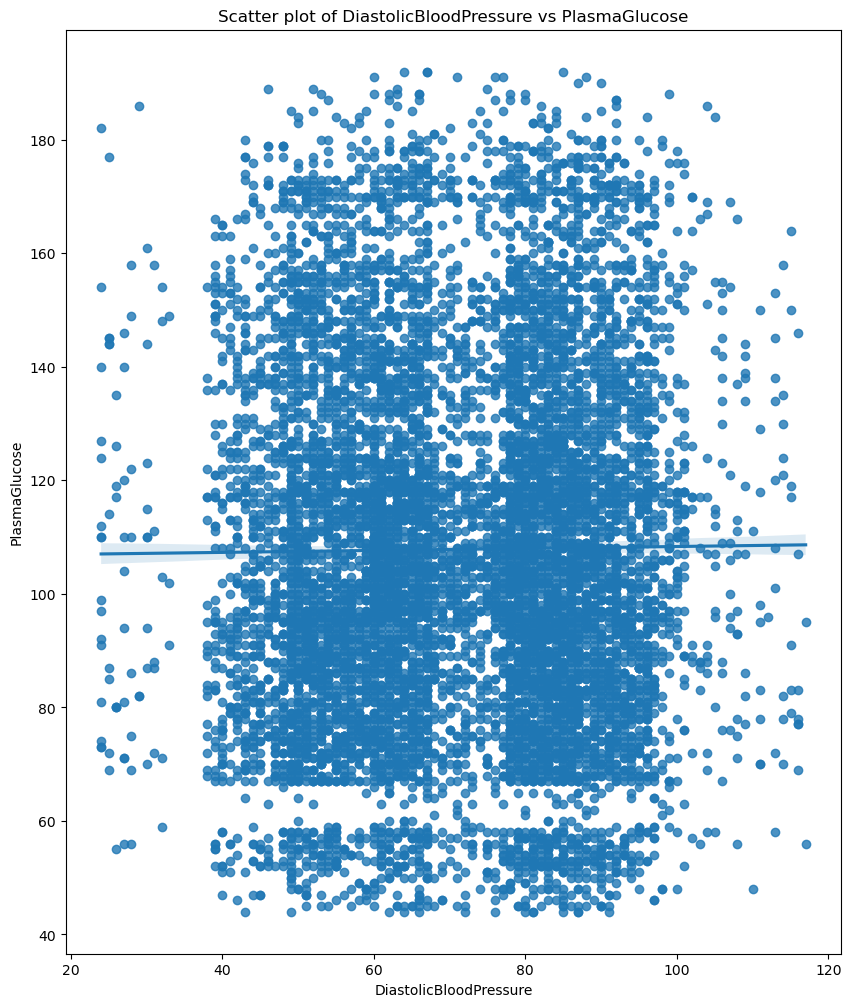

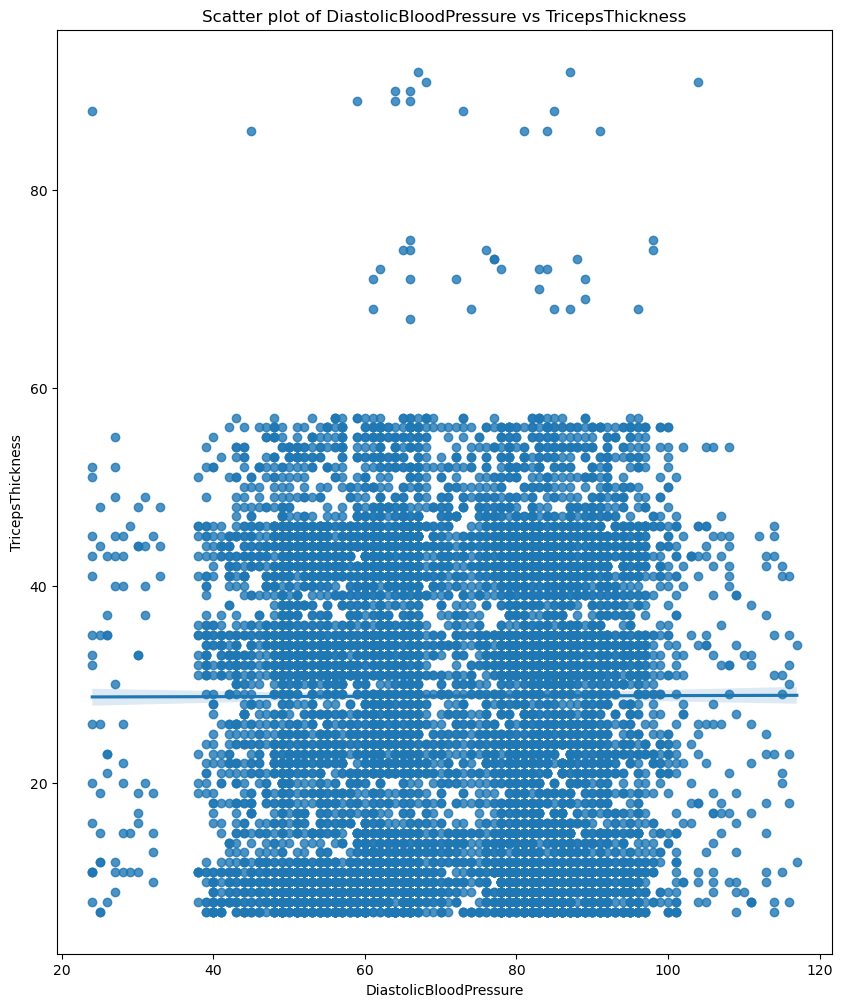

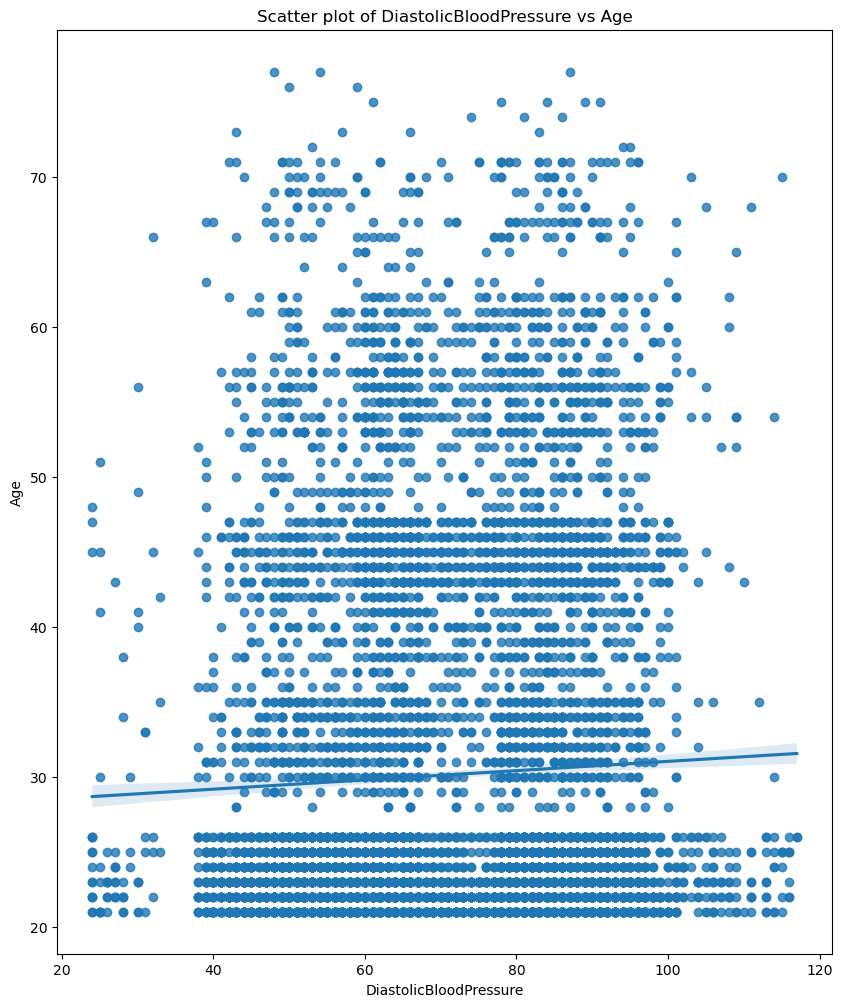

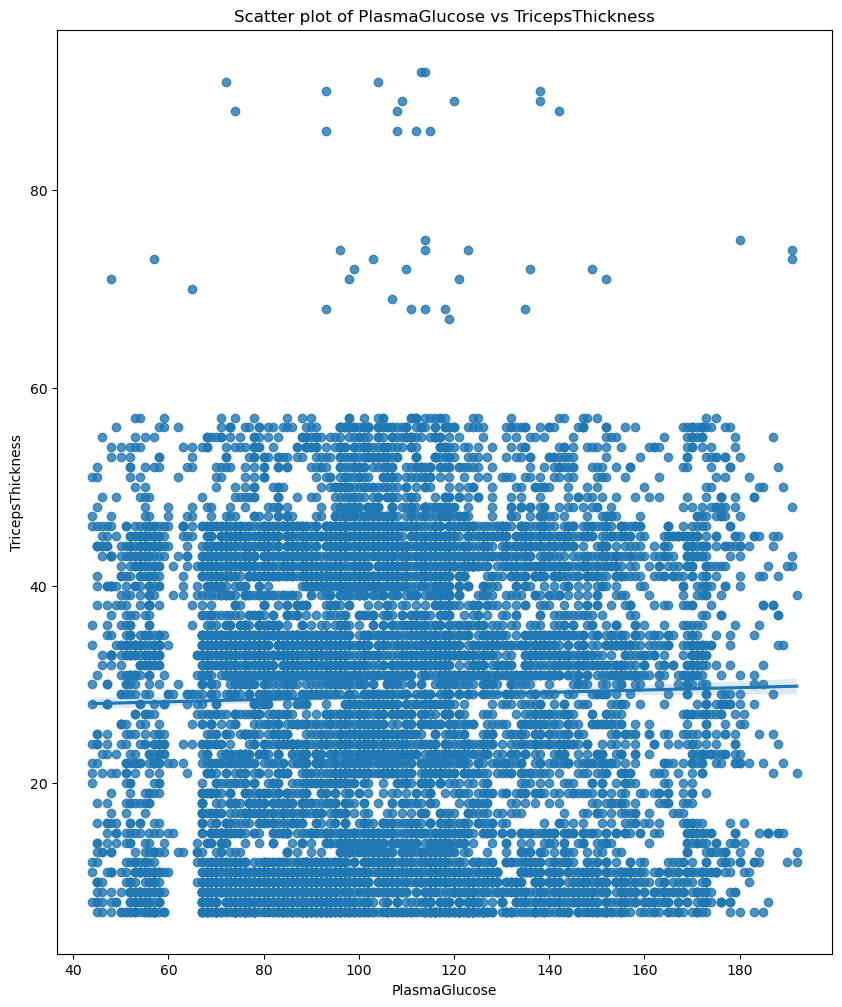

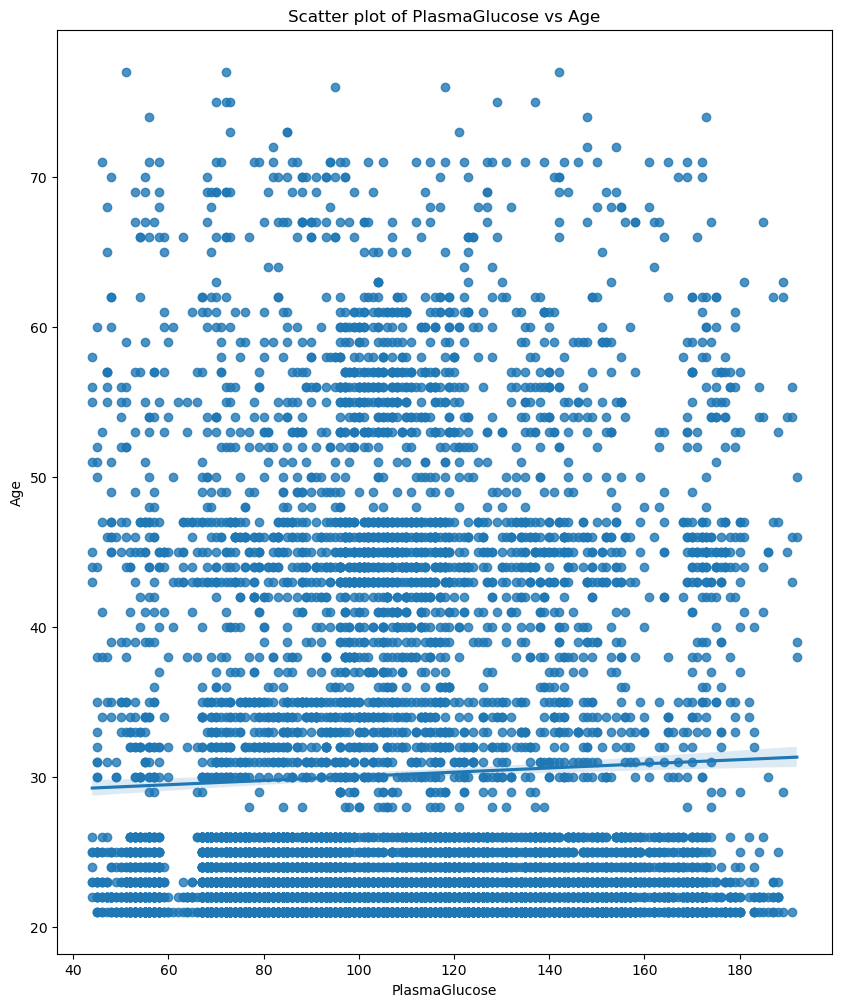

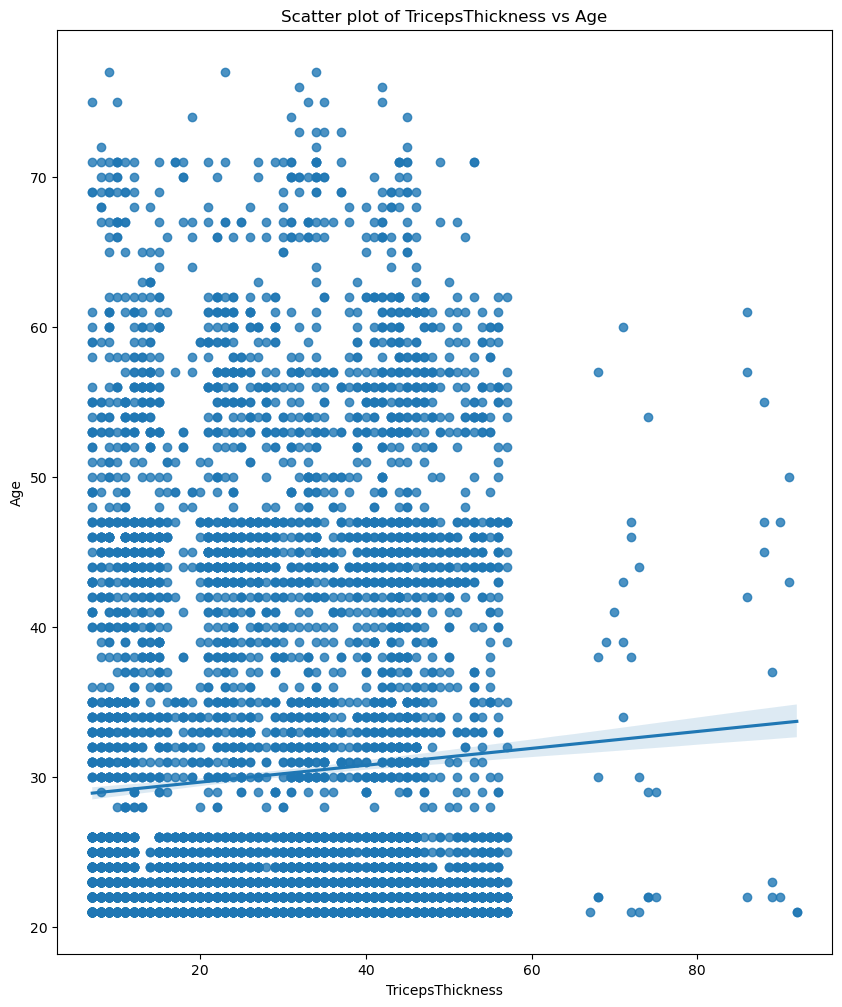

In [73]:
#%%writefile diabetes-exploratory-plots.py
# Plot distrubtions step

import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from itertools import combinations

# Create a function that we can re-use
def plot_correlations(data):
    """
    This function will make a correlation graph and save it
    """
    correlation = data.corr()
    print("Correlation between features\n", correlation)

    fig = plt.figure(figsize=(10, 12))
    sns.heatmap(data=correlation, annot=True)
    plt.title("Correlation betweeen features")

    # Save plot
    filename = "outputs/correlations-between-features.png"
    os.makedirs("outputs", exist_ok=True)
    fig.savefig(filename)


def plot_distribution(var_data, column_name=None):
    """
    This function will make a distribution (graph) and save it
    """

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(
        "{} Statistics:\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n".format(
            "" if column_name is None else column_name,
            min_val,
            mean_val,
            med_val,
            mod_val,
            max_val,
        )
    )

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize=(10, 4))

    # Plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel("Frequency")

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color="gray", linestyle="dashed", linewidth=2)
    ax[0].axvline(x=mean_val, color="cyan", linestyle="dashed", linewidth=2)
    ax[0].axvline(x=med_val, color="red", linestyle="dashed", linewidth=2)
    ax[0].axvline(x=mod_val, color="yellow", linestyle="dashed", linewidth=2)
    ax[0].axvline(x=max_val, color="gray", linestyle="dashed", linewidth=2)
    ax[0].legend()

    # Plot the boxplot
    ax[1].boxplot(var_data, vert=False)
    xlabel = "Value" if column_name is None else column_name
    ax[1].set_xlabel(xlabel)

    # Add a title to the Figure
    title = (
        "Data Distribution"
        if column_name is None
        else "{} Data Distribution".format(column_name)
    )
    fig.suptitle(title)

    # Save plot
    filename = "outputs/{}-distribution.png".format(column_name)
    os.makedirs("outputs", exist_ok=True)
    fig.savefig(filename)

def plot_scatters(x_y_data):
    """
    Plot scatter plots with :y_column: on y-axis and save them. 
    """
    
    x_column = x_y_data.columns.values[0]
    y_column = x_y_data.columns.values[1]

    fig = plt.figure(figsize=(10, 12))
    sns.regplot(data=x_y_data,x=x_column, y=y_column)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title("Scatter plot of {} vs {}".format(x_column,y_column))

    # Save plot
    filename = "outputs/Scatter plot of {} vs {}.png".format(x_column,y_column)
    os.makedirs("outputs", exist_ok=True)
    fig.savefig(filename)

print("Loading Data...")
diabetes = pd.read_csv("../../data/diabetes.csv")

# plot correlations
plot_correlations(data=diabetes)

# plot distributions
columns = diabetes.columns.values
for x in columns:
    plot_distribution(var_data=diabetes[x],column_name=x)

# plot scatter plots
columns = set(columns)
exlude_column = set(["Diabetic", "PatientID"])

column_comb=list(combinations(columns-exlude_column,2))
column_comb = [list(x) for x in column_comb]

for x_y_pairs in column_comb:
    plot_scatters(diabetes[x_y_pairs])

